In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

In [2]:
mood_data_sample1 = pd.read_csv('/home/michael/master_thesis/mood/mood_data_sample1.tsv', sep='\t')
mood_data_sample2 = pd.read_csv('/home/michael/master_thesis/mood/mood_data_sample2.tsv', sep='\t')
mood_means_sample1 = pd.read_csv('/home/michael/master_thesis/s1_mood_means_std.tsv', sep='\t', index_col=[0])
mood_means_sample2 = pd.read_csv('/home/michael/master_thesis/s2_mood_means_std.tsv', sep='\t', index_col=[0])

questionnaire_data = data = pd.read_csv('/home/michael/Desktop/corrected_data_questionnaires.tsv', sep='\t')
questionnaires_sum_scores = pd.read_csv('/home/michael/Desktop/sum_scores.tsv', sep='\t')

In [3]:
mood_data_sample2.columns

Index(['Erfolg', 'Stolz', 'Wärme', 'Zuneigung', 'Frustration', 'Enttäuschung',
       'Ärger', 'Wut', 'Trauer', 'Niedergeschlagenheit', 'Fröhlichkeit',
       'Freude', 'Peinlichkeit', 'gleichgueltig vs. interesse',
       'gelangweilt vs. motiviert', 'unangenehm vs. angenehm',
       'negativ vs. positiv', 'entspannt vs. angespannt', 'ruhig vs. nervoes',
       'Erwartung', 'condition', 'code'],
      dtype='object')

In [4]:
mood_data_sample2.columns

Index(['Erfolg', 'Stolz', 'Wärme', 'Zuneigung', 'Frustration', 'Enttäuschung',
       'Ärger', 'Wut', 'Trauer', 'Niedergeschlagenheit', 'Fröhlichkeit',
       'Freude', 'Peinlichkeit', 'gleichgueltig vs. interesse',
       'gelangweilt vs. motiviert', 'unangenehm vs. angenehm',
       'negativ vs. positiv', 'entspannt vs. angespannt', 'ruhig vs. nervoes',
       'Erwartung', 'condition', 'code'],
      dtype='object')

In [5]:
mood_data_sample1 = pd.read_csv('/home/michael/git/master_thesis/data/mood_data_sample1.tsv', sep='\t')
mood_data_sample2 = pd.read_csv('/home/michael/git/master_thesis/data/mood_data_sample2.tsv', sep='\t')

questionnaire_data = data = pd.read_csv('/home/michael/git/master_thesis/data/corrected_data_questionnaires.tsv', sep='\t')
questionnaires_sum_scores = pd.read_csv('/home/michael/git/master_thesis/data/sum_scores.tsv', sep='\t')

#  subject identifier
subj_id = ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18',
           '19', '20', '21', '22', '23', '24', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
           '38', '39']



# experimental condition: positive first = 1; negative first = 2
order = [1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1]

# add condition and identifier to data
questionnaire_data['vpn_num'] = subj_id
questionnaire_data['order'] = order

questionnaires_sum_scores['vpn_num'] = subj_id
questionnaires_sum_scores['order'] = order


# clean-up df for further analysis
questionnaires_sum_scores = questionnaires_sum_scores.drop(['neo-extraversion_sum_score',
                                                            'neo-neuroticism_sum_score',
                                                            'neo-aggreeablness_sum_score',
                                                            'mae_sum_score'], axis=1)

## MOOD DATA

# calculate means where previous analysis indicated them as apropriate to make both samples better comparable
erfolg_stolz = mood_data_sample2.loc[: , "Erfolg":"Stolz"]
mood_data_sample2['erfolg_stolz'] = erfolg_stolz.mean(axis=1)

froh_freudig = mood_data_sample2.loc[: , "Fröhlichkeit":"Freude"]
mood_data_sample2['froh_freudig'] = froh_freudig.mean(axis=1)

# drop redundant/non-informative data
mood_data_sample2 = mood_data_sample2.drop(['Trauer', 'Erfolg', 'Stolz', 'Fröhlichkeit', 
                                            'Freude', 'Wärme', 'Frustration', 'Ärger', 
                                            'gelangweilt vs. motiviert', 'negativ vs. positiv', 
                                            'gleichgueltig vs. interesse', 'ruhig vs. nervoes'], axis=1)



mood_data_sample1 = mood_data_sample1.drop(['lustlos vs. neugierig'], axis=1)

# rename columns for data merging between samples
mood_data_sample1 = mood_data_sample1.rename(columns={'niedergeschlagen_bedrueckt_betruebt_traurig':
                                                      'Niedergeschlagenheit',
                                                      'waerme_zuneigung':'Zuneigung',
                                                      'frustration_enttaeuschung':'Enttäuschung',
                                                      'froehlich_freudig_vergnuegt_entzueckt':'froh_freudig',
                                                      'aerger_wut':'Wut',
                                                      'peinlich':'Peinlichkeit',
                                                      'erwartung':'Erwartung'
                                                     })

mood_data = pd.concat([mood_data_sample1, mood_data_sample2])

mood_data = mood_data.sort_values(['code'], ascending=True)

# exclude participants number 25 and 26, as there is no clean questionnaire data for those
mood_data = mood_data[mood_data.code != 1025]
mood_data = mood_data[mood_data.code != 2025]
mood_data = mood_data[mood_data.code != 3025]
mood_data = mood_data[mood_data.code != 1026]
mood_data = mood_data[mood_data.code != 2026]
mood_data = mood_data[mood_data.code != 3026]


# expand identifier and condition list for continous format
mood_data_order = order * 3
mood_data['order'] = mood_data_order
mood_data_vpn_num = subj_id *3
mood_data['vpn_num'] = mood_data_vpn_num

mood_data.reset_index(drop=True, inplace=True)


In [6]:
mood_data.columns

Index(['code', 'erfolg_stolz', 'Niedergeschlagenheit', 'Zuneigung',
       'Enttäuschung', 'froh_freudig', 'Peinlichkeit', 'Wut', 'Erwartung',
       'unangenehm vs. angenehm', 'entspannt vs. angespannt', 'condition',
       'order', 'vpn_num'],
      dtype='object')

In [7]:
# rename columns for data merging between samples
mood_data_sample1 = mood_data_sample1.rename(columns={'niedergeschlagen_bedrueckt_betruebt_traurig':
                                                      'Niedergeschlagenheit',
                                                      'waerme_zuneigung':'Zuneigung',
                                                      'frustration_enttaeuschung':'Enttäuschung',
                                                      'froehlich_freudig_vergnuegt_entzueckt':'froh_freudig',
                                                      'aerger_wut':'Wut',
                                                      'peinlich':'Peinlichkeit',
                                                      'erwartung':'Erwartung'
                                                     })

In [8]:
# exclude participants number 25 and 26, as there is no clean questionnaire data for those
mood_data = mood_data[mood_data.code != 1025]
mood_data = mood_data[mood_data.code != 2025]
mood_data = mood_data[mood_data.code != 3025]
mood_data = mood_data[mood_data.code != 1026]
mood_data = mood_data[mood_data.code != 2026]
mood_data = mood_data[mood_data.code != 3026]


In [9]:
mood_data.reset_index(drop=True, inplace=True)

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(mood_data)

,code,erfolg_stolz,Niedergeschlagenheit,Zuneigung,Enttäuschung,froh_freudig,Peinlichkeit,Wut,Erwartung,unangenehm vs. angenehm,entspannt vs. angespannt,condition,order,vpn_num
0,1002,4.0,5,6,4,4.0,1,6,6,7,4,baseline,1,02
1,1003,7.0,2,6,1,6.0,1,2,7,8,7,baseline,2,03
2,1004,7.0,1,7,1,5.0,1,1,8,8,8,baseline,1,04
3,1005,1.0,1,2,1,5.0,1,1,5,5,8,baseline,2,05
4,1006,4.0,1,5,1,6.0,3,1,6,-,-,baseline,1,06
5,1007,7.0,2,8,2,7.0,1,1,6,7,4,baseline,2,07
6,1008,5.0,6,1,1,5.0,1,1,5,5,9,baseline,1,08
7,1009,4.0,1,3,1,6.0,1,1,5,8,7,baseline,2,09
8,1010,5.0,3,3,2,5.0,2,1,6,5,6,baseline,1,10
9,1011,7.0,1,5,1,4.0,1,1,7,7,5,baseline,1,11


In [11]:
# split dataframe by condition
grouped = mood_data.groupby(mood_data.condition)

mood_data_baseline = grouped.get_group("baseline")
mood_data_neg = grouped.get_group("negative")
mood_data_pos = grouped.get_group("positive")

mood_data_baseline.reset_index(drop=True, inplace=True)
mood_data_neg.reset_index(drop=True, inplace=True)
mood_data_pos.reset_index(drop=True, inplace=True)


In [12]:
mood_data.columns

Index(['code', 'erfolg_stolz', 'Niedergeschlagenheit', 'Zuneigung',
       'Enttäuschung', 'froh_freudig', 'Peinlichkeit', 'Wut', 'Erwartung',
       'unangenehm vs. angenehm', 'entspannt vs. angespannt', 'condition',
       'order', 'vpn_num'],
      dtype='object')

In [13]:
# split dataframe by order (pos or neg first)
grouped = mood_data.groupby(mood_data.order)

mood_data_pos_first = grouped.get_group(1)
mood_data_neg_first = grouped.get_group(2)


mood_data_pos_first.reset_index(drop=True, inplace=True)
mood_data_neg_first.reset_index(drop=True, inplace=True)

In [14]:
# split dataframe into blocks (pos condition)
grouped = mood_data_pos_first.groupby(mood_data_pos_first.condition)

mood_data_baseline_pos_first = grouped.get_group("baseline")
mood_data_neg_pos_first = grouped.get_group("negative")
mood_data_pos_pos_first = grouped.get_group("positive")

mood_data_baseline_pos_first.reset_index(drop=True, inplace=True)
mood_data_neg_pos_first.reset_index(drop=True, inplace=True)
mood_data_pos_pos_first.reset_index(drop=True, inplace=True)

# split dataframe into blocks (neg condition)
grouped = mood_data_neg_first.groupby(mood_data_neg_first.condition)

mood_data_baseline_neg_first = grouped.get_group("baseline")
mood_data_neg_neg_first = grouped.get_group("negative")
mood_data_pos_neg_first = grouped.get_group("positive")

mood_data_baseline_neg_first.reset_index(drop=True, inplace=True)
mood_data_neg_neg_first.reset_index(drop=True, inplace=True)
mood_data_pos_neg_first.reset_index(drop=True, inplace=True)


In [15]:
# rename columns for data merging between experimental conditions 
mood_data_baseline_pos_first = mood_data_baseline_pos_first.rename(
                                                columns={'erfolg_stolz':'erfolg_stolz_baseline',
                                                         'Niedergeschlagenheit':'Niedergeschlagenheit_baseline',
                                                         'Zuneigung':'Zuneigung_baseline',
                                                         'Enttäuschung':'Enttäuschung_baseline',
                                                         'froh_freudig':'froh_freudig_baseline',
                                                         'Peinlichkeit':'Peinlichkeit_baseline',
                                                         'Wut':'Wut_baseline',
                                                         'Erwartung':'Erwartung_baseline',
                                                         'unangenehm vs. angenehm':'unangenehm vs. angenehm baseline',
                                                         'entspannt vs. angespannt':'entspannt vs. angespannt baseline'
                                                        })

# rename columns for data merging between experimental conditions 
mood_data_neg_pos_first = mood_data_neg_pos_first.rename(
                                                columns={'erfolg_stolz':'erfolg_stolz_negative',
                                                         'Niedergeschlagenheit':'Niedergeschlagenheit_negative',
                                                         'Zuneigung':'Zuneigung_negative',
                                                         'Enttäuschung':'Enttäuschung_negative',
                                                         'froh_freudig':'froh_freudig_negative',
                                                         'Peinlichkeit':'Peinlichkeit_negative',
                                                         'Wut':'Wut_negative',
                                                         'Erwartung':'Erwartung_negative',
                                                         'unangenehm vs. angenehm':'unangenehm vs. angenehm negative',
                                                         'entspannt vs. angespannt':'entspannt vs. angespannt negative'
                                                        })

# rename columns for data merging between experimental conditions 
mood_data_pos_pos_first = mood_data_pos_pos_first.rename(
                                                columns={'erfolg_stolz':'erfolg_stolz_positive',
                                                         'Niedergeschlagenheit':'Niedergeschlagenheit_positive',
                                                         'Zuneigung':'Zuneigung_positive',
                                                         'Enttäuschung':'Enttäuschung_positive',
                                                         'froh_freudig':'froh_freudig_positive',
                                                         'Peinlichkeit':'Peinlichkeit_positive',
                                                         'Wut':'Wut_positive',
                                                         'Erwartung':'Erwartung_positive',
                                                         'unangenehm vs. angenehm':'unangenehm vs. angenehm positive',
                                                         'entspannt vs. angespannt':'entspannt vs. angespannt positive'
                                                        })

mood_data_baseline_pos_first = mood_data_baseline_pos_first.drop(['code', 'order', 'vpn_num', 'condition'], axis=1)
mood_data_neg_pos_first = mood_data_neg_pos_first.drop(['code', 'order', 'vpn_num', 'condition'], axis=1)
mood_data_pos_pos_first = mood_data_pos_pos_first.drop(['code', 'order', 'vpn_num', 'condition'], axis=1)

In [16]:
mood_data_baseline_pos_first.columns

Index(['erfolg_stolz_baseline', 'Niedergeschlagenheit_baseline',
       'Zuneigung_baseline', 'Enttäuschung_baseline', 'froh_freudig_baseline',
       'Peinlichkeit_baseline', 'Wut_baseline', 'Erwartung_baseline',
       'unangenehm vs. angenehm baseline',
       'entspannt vs. angespannt baseline'],
      dtype='object')

In [17]:
# rename columns for data merging between experimental conditions 
mood_data_baseline_neg_first = mood_data_baseline_neg_first.rename(
                                                columns={'erfolg_stolz':'erfolg_stolz_baseline',
                                                         'Niedergeschlagenheit':'Niedergeschlagenheit_baseline',
                                                         'Zuneigung':'Zuneigung_baseline',
                                                         'Enttäuschung':'Enttäuschung_baseline',
                                                         'froh_freudig':'froh_freudig_baseline',
                                                         'Peinlichkeit':'Peinlichkeit_baseline',
                                                         'Wut':'Wut_baseline',
                                                         'Erwartung':'Erwartung_baseline',
                                                         'unangenehm vs. angenehm':'unangenehm vs. angenehm baseline',
                                                         'entspannt vs. angespannt':'entspannt vs. angespannt baseline'
                                                        })

# rename columns for data merging between experimental conditions 
mood_data_neg_neg_first = mood_data_neg_neg_first.rename(
                                                columns={'erfolg_stolz':'erfolg_stolz_negative',
                                                         'Niedergeschlagenheit':'Niedergeschlagenheit_negative',
                                                         'Zuneigung':'Zuneigung_negative',
                                                         'Enttäuschung':'Enttäuschung_negative',
                                                         'froh_freudig':'froh_freudig_negative',
                                                         'Peinlichkeit':'Peinlichkeit_negative',
                                                         'Wut':'Wut_negative',
                                                         'Erwartung':'Erwartung_negative',
                                                         'unangenehm vs. angenehm':'unangenehm vs. angenehm negative',
                                                         'entspannt vs. angespannt':'entspannt vs. angespannt negative'
                                                        })

# rename columns for data merging between experimental conditions 
mood_data_pos_neg_first = mood_data_pos_neg_first.rename(
                                                columns={'erfolg_stolz':'erfolg_stolz_positive',
                                                         'Niedergeschlagenheit':'Niedergeschlagenheit_positive',
                                                         'Zuneigung':'Zuneigung_positive',
                                                         'Enttäuschung':'Enttäuschung_positive',
                                                         'froh_freudig':'froh_freudig_positive',
                                                         'Peinlichkeit':'Peinlichkeit_positive',
                                                         'Wut':'Wut_positive',
                                                         'Erwartung':'Erwartung_positive',
                                                         'unangenehm vs. angenehm':'unangenehm vs. angenehm positive',
                                                         'entspannt vs. angespannt':'entspannt vs. angespannt positive'
                                                        })
mood_data_baseline_neg_first = mood_data_baseline_neg_first.drop(['code', 'order', 'vpn_num', 'condition'], axis=1)
mood_data_neg_neg_first = mood_data_neg_neg_first.drop(['code', 'order', 'vpn_num', 'condition'], axis=1)
mood_data_pos_neg_first = mood_data_pos_neg_first.drop(['code', 'order', 'vpn_num', 'condition'], axis=1)

In [18]:
# split dataframe by order
grouped = questionnaires_sum_scores.groupby(questionnaires_sum_scores.order)

questionnaires_sum_scores_pos_first = grouped.get_group(1)
questionnaires_sum_scores_neg_first = grouped.get_group(2)


questionnaires_sum_scores_pos_first.reset_index(drop=True, inplace=True)
questionnaires_sum_scores_neg_first.reset_index(drop=True, inplace=True)


In [19]:
#display(mood_data_baseline.corrwith(mood_data_pos, axis = 0, method='spearman'))
#display(mood_data_baseline.corrwith(mood_data_neg, axis = 0, method='spearman'))
#display(mood_data_pos.corrwith(mood_data_neg, axis = 0, method='spearman'))

In [20]:
# merge dataframes for corr
corr_matrix_prep_pos_first_1st_2nd = pd.concat([mood_data_baseline_pos_first, mood_data_pos_pos_first], axis=1)
corr_matrix_prep_pos_first_2nd_3rd = pd.concat([mood_data_pos_pos_first, mood_data_neg_pos_first], axis=1)
corr_matrix_prep_neg_first_1st_2nd = pd.concat([mood_data_baseline_neg_first, mood_data_neg_neg_first], axis=1)
corr_matrix_prep_neg_first_2nd_3rd = pd.concat([mood_data_neg_neg_first, mood_data_pos_neg_first], axis=1)


In [21]:
# calc corr matrix
corr_matrix_pos_first_1st_2nd = corr_matrix_prep_pos_first_1st_2nd.corr(method='spearman')
corr_matrix_pos_first_2nd_3rd = corr_matrix_prep_pos_first_2nd_3rd.corr(method='spearman')
corr_matrix_neg_first_1st_2nd = corr_matrix_prep_neg_first_1st_2nd.corr(method='spearman')
corr_matrix_neg_first_2nd_3rd = corr_matrix_prep_neg_first_2nd_3rd.corr(method='spearman')


## Relation between mood data and experimental block split by condition

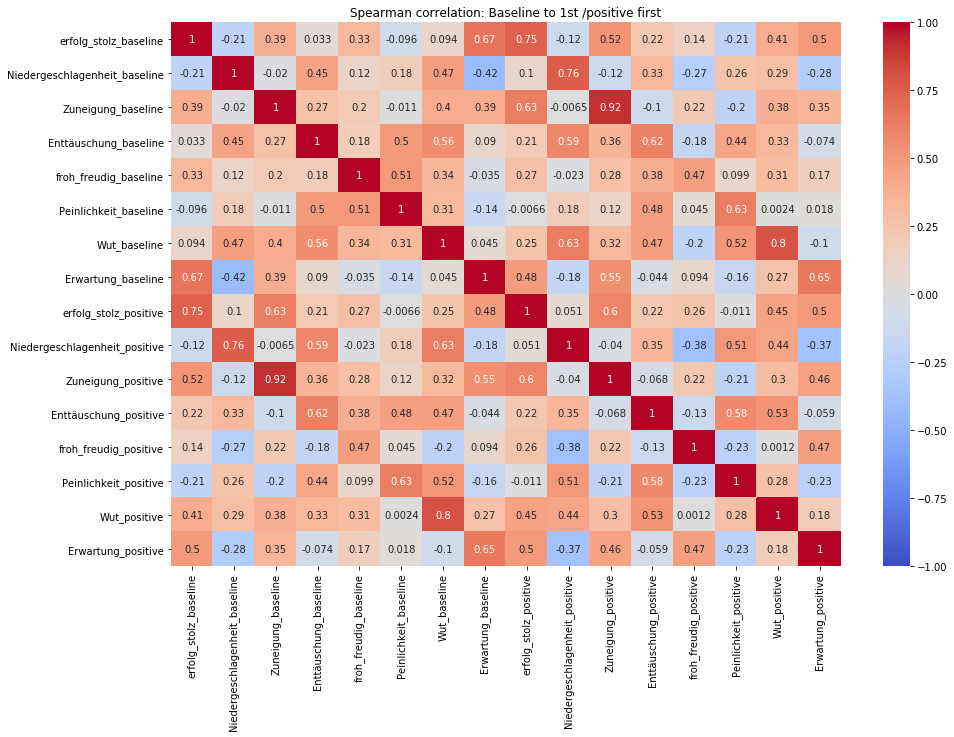

In [22]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_pos_first_1st_2nd, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Spearman correlation: Baseline to 1st /positive first')

sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_pos_first_1st_2nd.png", 
                        dpi=300, bbox_inches='tight')

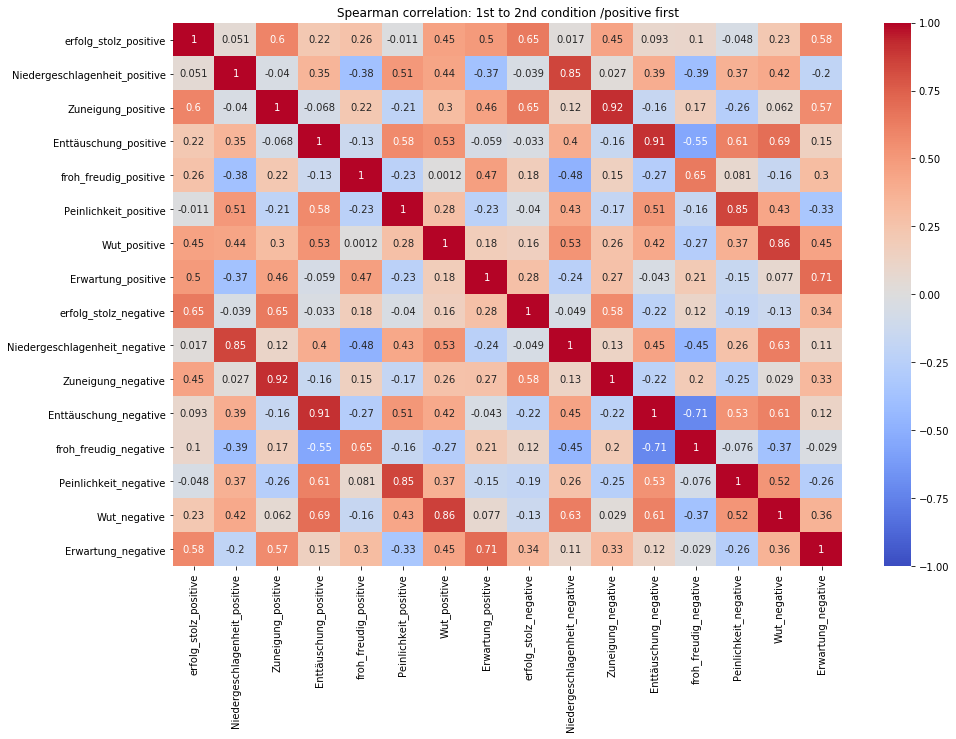

In [23]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_pos_first_2nd_3rd, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)

plt.title('Spearman correlation: 1st to 2nd condition /positive first')
sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_pos_first_2nd_3rd.png", 
                        dpi=300, bbox_inches='tight')

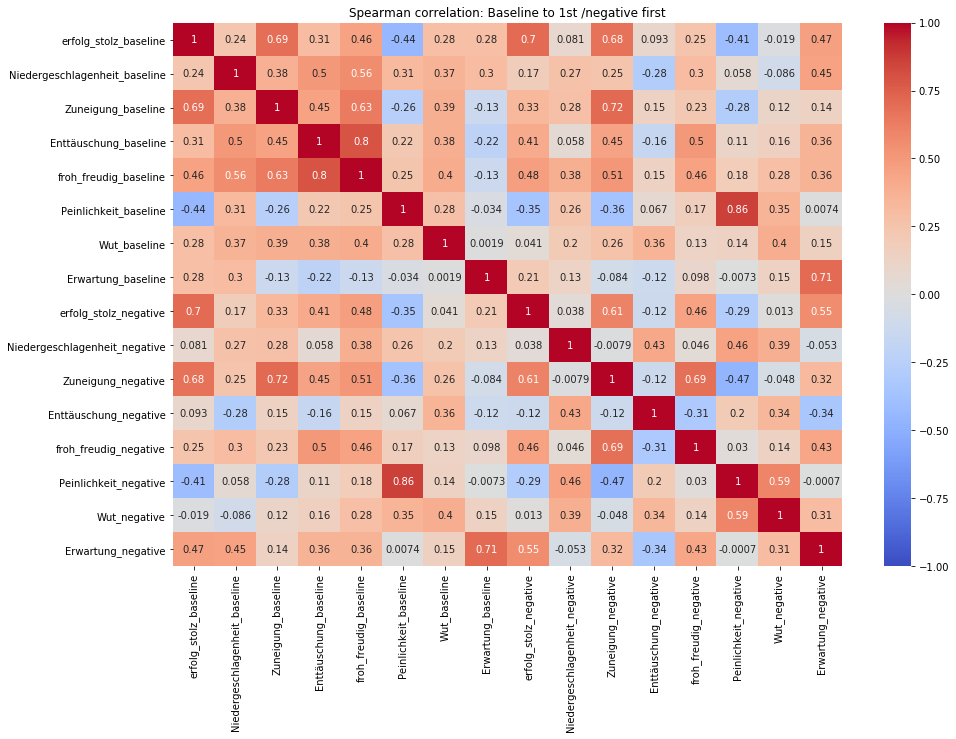

In [24]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_neg_first_1st_2nd, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)

plt.title('Spearman correlation: Baseline to 1st /negative first')
sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_neg_first_1st_2nd.png", 
                        dpi=300, bbox_inches='tight')

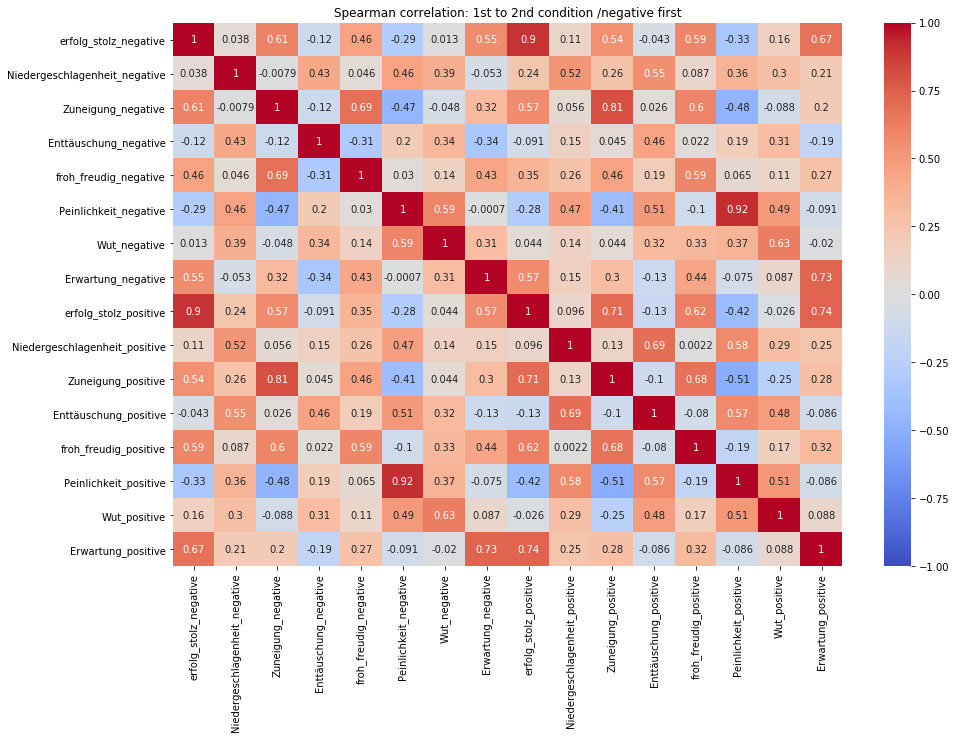

In [25]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_neg_first_2nd_3rd, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)

plt.title('Spearman correlation: 1st to 2nd condition /negative first')
sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_neg_first_2nd_3rd.png", 
                        dpi=300, bbox_inches='tight')

## Corr-Matrix for questionnaire and mood per block


In [26]:
questionnaires_sum_scores.columns

Index(['bdi_sum_score', 'des_sum_score', 'sp_sum_score', 'vpn_num', 'order'], dtype='object')

In [27]:
# merge dataframes for corr
questionnaires_mood_baseline = pd.concat([questionnaires_sum_scores, mood_data_baseline], axis=1)
questionnaires_mood_neg = pd.concat([questionnaires_sum_scores, mood_data_neg], axis=1)
questionnaires_mood_pos = pd.concat([questionnaires_sum_scores, mood_data_pos], axis=1)

questionnaires_mood_baseline_neg_1st = pd.concat([questionnaires_sum_scores, mood_data_baseline_neg_first], axis=1)
questionnaires_mood_neg_neg_1st = pd.concat([questionnaires_sum_scores, mood_data_neg_neg_first], axis=1)
questionnaires_mood_pos_neg_1st = pd.concat([questionnaires_sum_scores, mood_data_pos_neg_first], axis=1)

questionnaires_mood_baseline_pos_1st = pd.concat([questionnaires_sum_scores, mood_data_baseline_pos_first], axis=1)
questionnaires_mood_neg_pos_1st = pd.concat([questionnaires_sum_scores, mood_data_neg_pos_first], axis=1)
questionnaires_mood_pos_pos_1st = pd.concat([questionnaires_sum_scores, mood_data_pos_pos_first], axis=1)

# calc corr matrix
corr_matrix_questionnaires_mood_baseline = questionnaires_mood_baseline.corr(method='spearman')
corr_matrix_questionnaires_mood_neg = questionnaires_mood_neg.corr(method='spearman')
corr_matrix_questionnaires_mood_pos = questionnaires_mood_pos.corr(method='spearman')

corr_matrix_questionnaires_mood_baseline_neg_1st = questionnaires_mood_baseline_neg_1st.corr(method='spearman')
corr_matrix_questionnaires_mood_neg_neg_1st = questionnaires_mood_neg_neg_1st.corr(method='spearman')
corr_matrix_questionnaires_mood_pos_neg_1st = questionnaires_mood_pos_neg_1st.corr(method='spearman')

corr_matrix_questionnaires_mood_baseline_pos_1st = questionnaires_mood_baseline_pos_1st.corr(method='spearman')
corr_matrix_questionnaires_mood_neg_pos_1st = questionnaires_mood_neg_pos_1st.corr(method='spearman')
corr_matrix_questionnaires_mood_pos_pos_1st = questionnaires_mood_pos_pos_1st.corr(method='spearman')


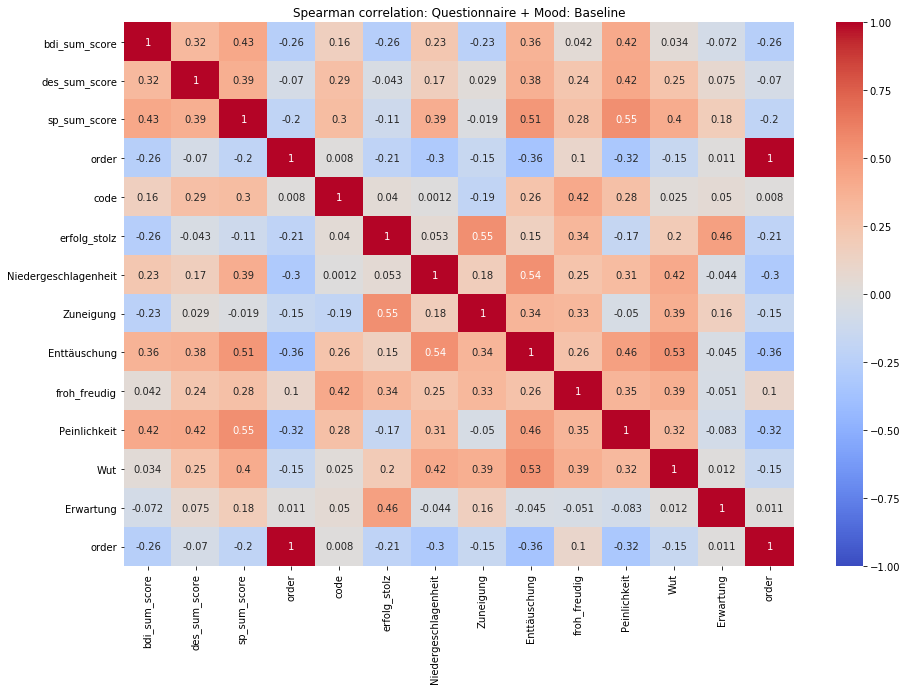

In [28]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_questionnaires_mood_baseline, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)

plt.title('Spearman correlation: Questionnaire + Mood: Baseline')
sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_questionnaires_mood_baseline.png", 
                        dpi=300, bbox_inches='tight')

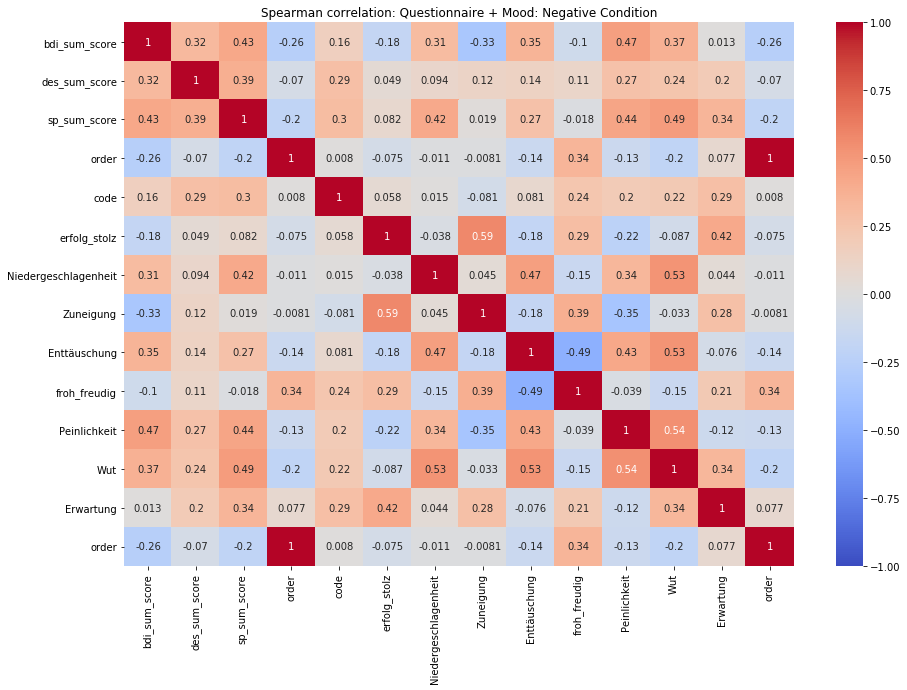

In [29]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_questionnaires_mood_neg, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)

plt.title('Spearman correlation: Questionnaire + Mood: Negative Condition')
sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_questionnaires_mood_neg.png", 
                        dpi=300, bbox_inches='tight')

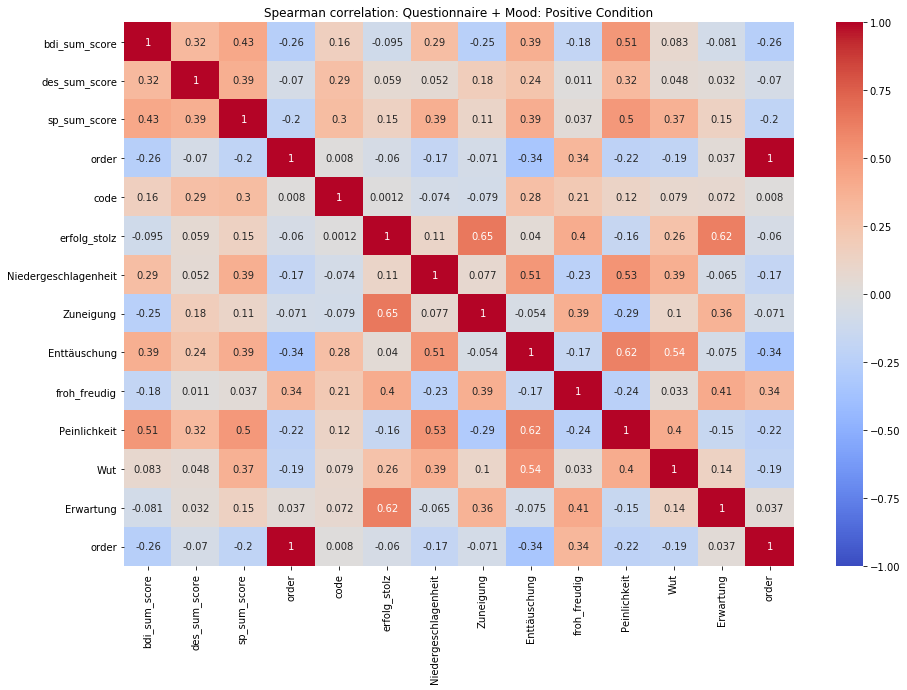

In [30]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_questionnaires_mood_pos, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)

plt.title('Spearman correlation: Questionnaire + Mood: Positive Condition')
sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_questionnaires_mood_pos.png", 
                        dpi=300, bbox_inches='tight')


### Corr-Matrix for mood and questionnaire data split by condition (Negative or Positive first)

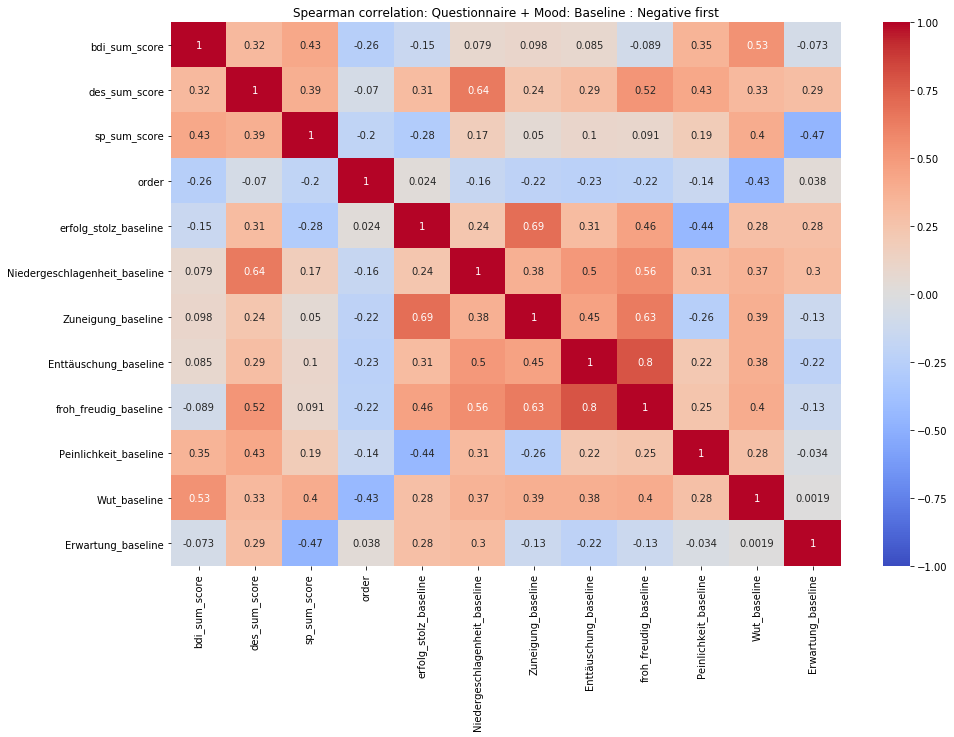

In [31]:
# Negative First Baseline
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_questionnaires_mood_baseline_neg_1st, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)

plt.title('Spearman correlation: Questionnaire + Mood: Baseline : Negative first')
sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_questionnaires_mood_baseline_neg_1st.png", 
                        dpi=300, bbox_inches='tight')

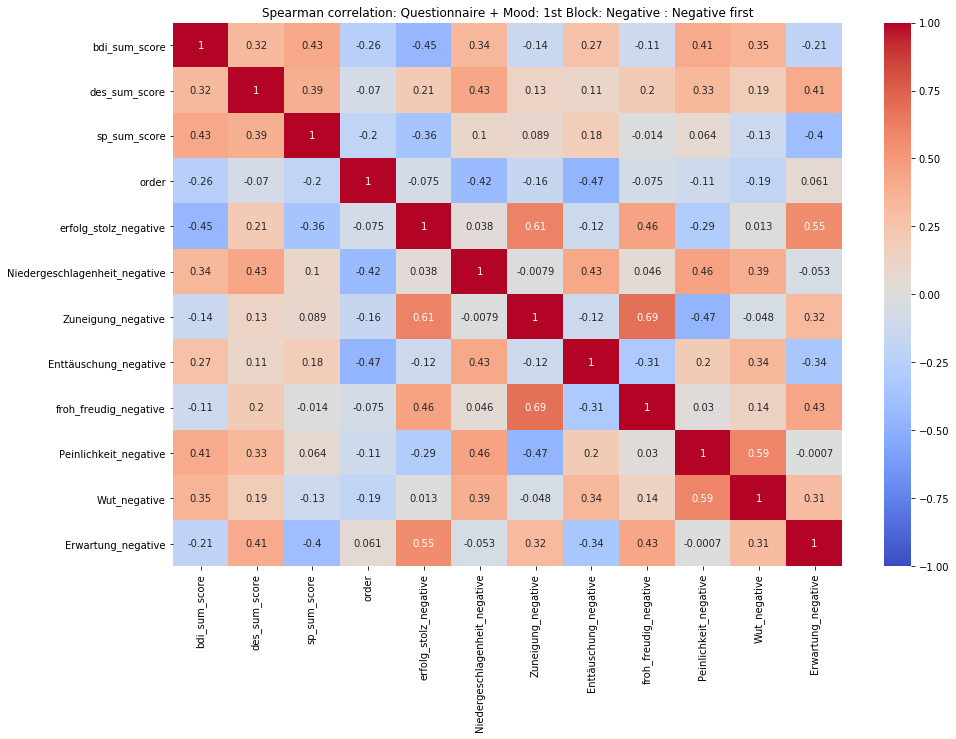

In [32]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_questionnaires_mood_neg_neg_1st, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)

plt.title('Spearman correlation: Questionnaire + Mood: 1st Block: Negative : Negative first')
sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_questionnaires_mood_neg_neg_1st.png", 
                        dpi=300, bbox_inches='tight')

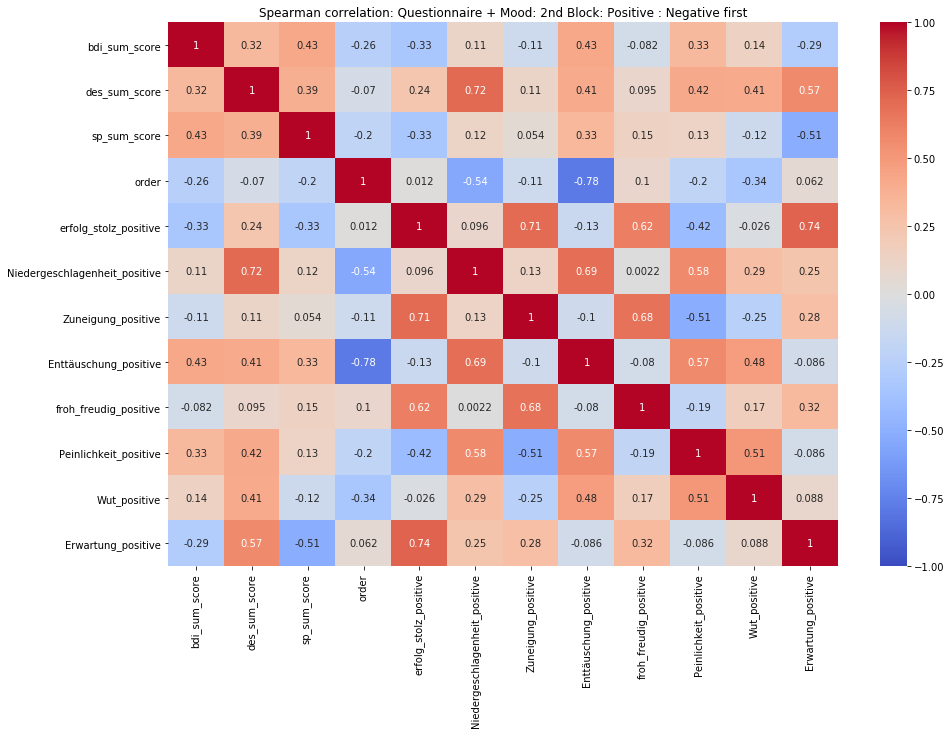

In [33]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_questionnaires_mood_pos_neg_1st, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)

plt.title('Spearman correlation: Questionnaire + Mood: 2nd Block: Positive : Negative first')
sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_questionnaires_mood_pos_neg_1st.png", 
                        dpi=300, bbox_inches='tight')

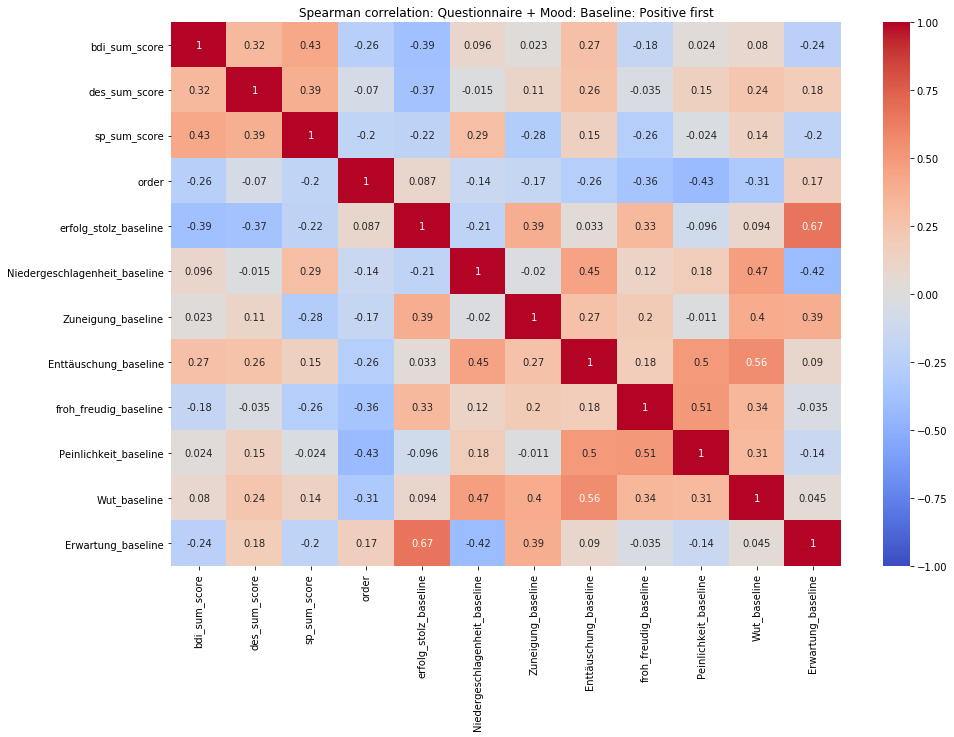

In [34]:
# Positive First
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_questionnaires_mood_baseline_pos_1st, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)

plt.title('Spearman correlation: Questionnaire + Mood: Baseline: Positive first')
sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_questionnaires_mood_baseline_pos_1st.png", 
                        dpi=300, bbox_inches='tight')

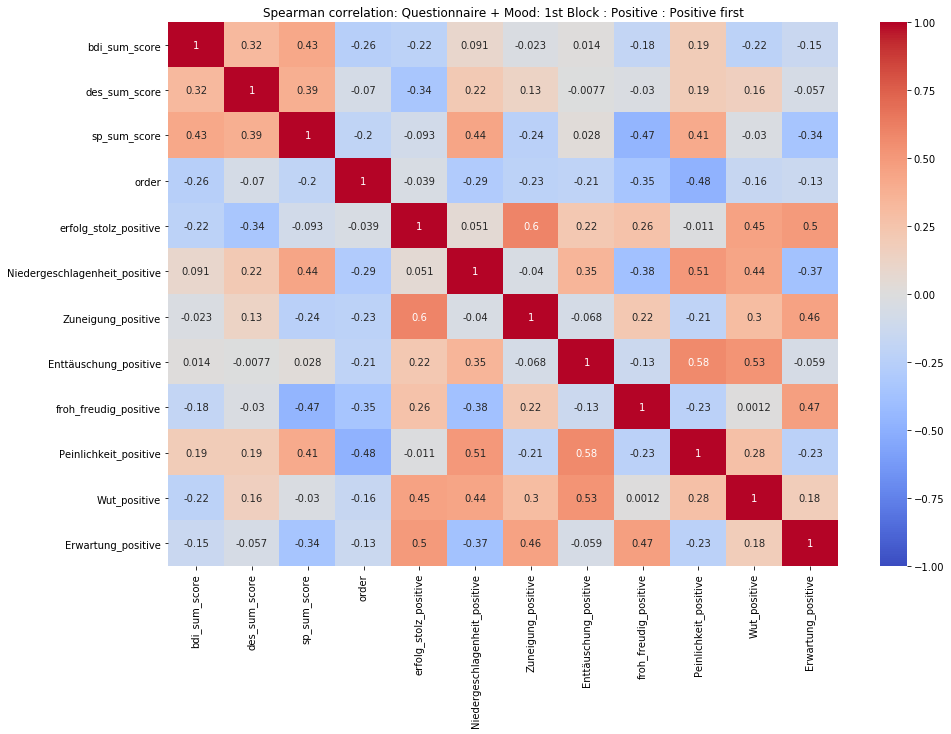

In [35]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_questionnaires_mood_pos_pos_1st, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)

plt.title('Spearman correlation: Questionnaire + Mood: 1st Block : Positive : Positive first')
sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_questionnaires_mood_pos_pos_1st.png", 
                        dpi=300, bbox_inches='tight')

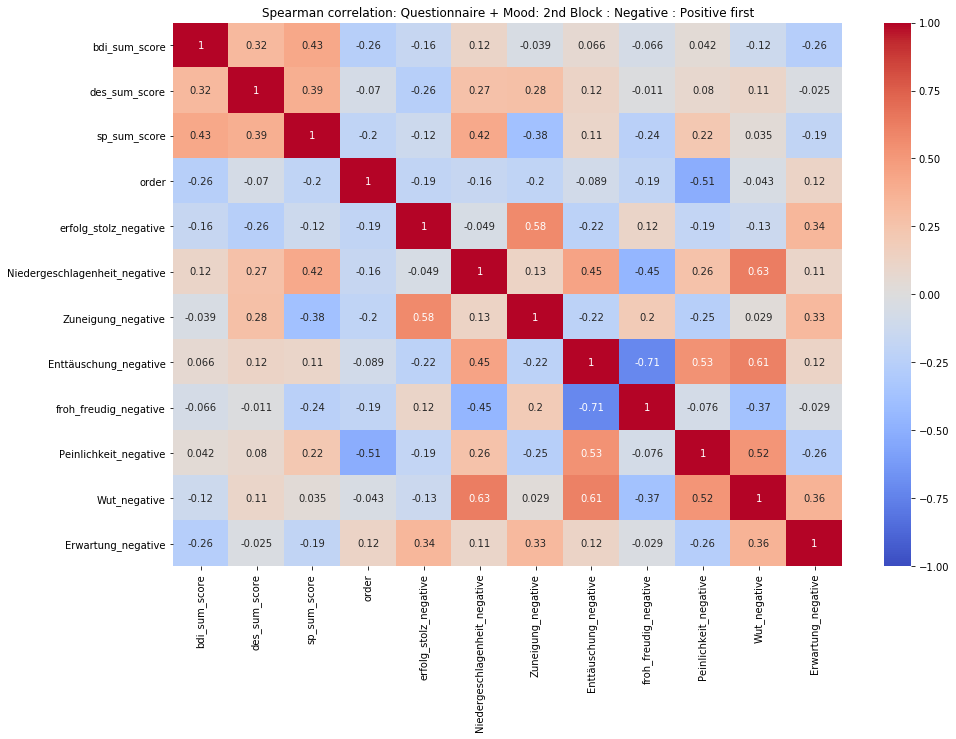

In [36]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(corr_matrix_questionnaires_mood_neg_pos_1st, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)

plt.title('Spearman correlation: Questionnaire + Mood: 2nd Block : Negative : Positive first')
sns_plot.figure.savefig("/home/michael/master_thesis/mood/correlations/plots/corr_matrix_questionnaires_mood_neg_pos_1st.png", 
                        dpi=300, bbox_inches='tight')